**Proyecto final- Ana Villa, Valeria Restrepo y Natalia Duque**

*Módelo Naive Bayes*

0. Carga de liberías de trabajo

In [ ]:
import numpy as np #Funciones matemáticas
import pandas as pd #Conexión con archivos de Excel

from sklearn.naive_bayes import GaussianNB  #Modelo Gaussian Naive Bayes
from sklearn.metrics import confusion_matrix #Metricas- Como lo voy a evaluar

1. Carga de base de datos

In [ ]:
nxl="/content/Plastic Waste Around the World.xlsx"
XDB=pd.read_excel(nxl,sheet_name=0)

XD=XDB[["Country","Total_Plastic_Waste_MT","Main_Sources","Recycling_Rate","Per_Capita_Waste_KG","Coastal_Waste_Risk"]]
XDB=XDB.dropna() #Para evitar celdas vacias


#Creamos el DataMart
XD=XDB[["Country","Total_Plastic_Waste_MT","Main_Sources","Recycling_Rate","Per_Capita_Waste_KG"]] #Variables Entrada
yd=XDB[["Coastal_Waste_Risk"]] #Valor Deseado- Aprenda el modelo

print("El mapa de codigos de Country es:", pd.Categorical(XD["Country"]))
print("El mapa de codigos de Main_Sources es:", pd.Categorical(XD["Main_Sources"]))
print("El mapa de codigos de Coastal_Waste_Risk es:", pd.Categorical(yd["Coastal_Waste_Risk"]))

XD["Country"]=pd.Categorical(XD["Country"]).codes
XD["Main_Sources"]=pd.Categorical(XD["Main_Sources"]).codes
yd["Coastal_Waste_Risk"]=pd.Categorical(yd["Coastal_Waste_Risk"]).codes

print(XD)
print(yd)

conteo = yd.value_counts()
porcentaje_categorias = (conteo/len(XD))*100
print(porcentaje_categorias)



El mapa de codigos de Country es: ['China', 'United States', 'India', 'Japan', 'Germany', ..., 'Marshall Islands', 'Micronesia', 'Palau', 'Tuvalu', 'Nauru']
Length: 165
Categories (165, object): ['Afghanistan', 'Albania', 'Algeria', 'Angola', ..., 'Western Sahara', 'Yemen',
                           'Zambia', 'Zimbabwe']
El mapa de codigos de Main_Sources es: ['Packaging_Industrial', 'Packaging_Consumer', 'Consumer_Goods', 'Packaging_Electronics', 'Automotive_Packaging', ..., 'Consumer_Packaging', 'Consumer_Packaging', 'Consumer_Packaging', 'Consumer_Packaging', 'Consumer_Packaging']
Length: 165
Categories (10, object): ['Automotive_Packaging', 'Consumer_Goods', 'Consumer_Packaging',
                          'Electronics_Packaging', ..., 'Industrial_Packaging', 'Packaging_Consumer',
                          'Packaging_Electronics', 'Packaging_Industrial']
El mapa de codigos de Coastal_Waste_Risk es: ['High', 'Medium', 'High', 'Medium', 'Low', ..., 'High', 'High', 'High', 'High', 'Hi

2. Se procede con la configuración y evaluación del modelo Naive Bayes

In [ ]:
mnb=GaussianNB()
mnb.fit(XD,yd)
np.set_printoptions(precision=3, suppress = True)
#Analizamos los resulatdos arrojados por el modelo
u=mnb.theta_ #Son las medias
print("Las medias de las variables son:\n ",u)
sigma=np.sqrt(mnb.var_) #Obtengo las desviaciones
print("Los valores de las desviaciones son:\n",sigma)

#Se procede con el análisis de las variaciones de las variables
LS=u+sigma
print("Los limites superiores para las variables son:\n ",LS)
LI=u-sigma
print("Los limites inferiores para las variables son:\n ",LI)


#Prediciendo países
ydp=mnb.predict(XD)
XSC=[[61,26.33,1,11.5,19.3]]
ydsc=mnb.predict(XSC)
print("Los resultados de la predicción son:\n",ydsc)



#Confusion Matrix
cm=confusion_matrix(yd,ydp)
print("La matriz de confusión es::\n", cm)

VN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
VP=cm[1,1]
print("VN=",VN,"FP=",FP,"FN=",FN,"VP=",VP)

Exactitud=(VP+VN)/len(XD)
print("la exactitud es=",Exactitud)

Tasa_de_error= (FP+FN)/len(XD)
print("La tasa de error del modelo es: ", Tasa_de_error)

sensibilidad= VP/(VP+FN)
print("La sensibilidad del modelo es: ", sensibilidad)

especificidad= VN/(VN+FN)
print("La especificidad del modelo es: ", especificidad)

pres= VP/(VP+FP)
print("La precisión del modelo es: ", pres)

PredNeg= VN/(VN+FN)
print("La predicción negativa del modelo es: ", PredNeg)

Las medias de las variables son:
  [[ 86.149   1.691   2.122   5.499  89.673]
 [ 75.019   0.968   3.667  19.663 148.285]
 [ 81.152   2.938   2.788  19.782 163.461]
 [106.5     2.515   3.5     9.85   33.675]]
Los valores de las desviaciones son:
 [[ 45.169   7.39    0.885   6.74  162.22 ]
 [ 48.35    1.291   2.269  19.9   253.226]
 [ 50.887   7.128   1.871  19.639 276.881]
 [ 36.514   2.123   0.866   4.424  22.925]]
Los limites superiores para las variables son:
  [[131.318   9.081   3.006  12.238 251.893]
 [123.369   2.259   5.936  39.563 401.511]
 [132.038  10.065   4.659  39.421 440.342]
 [143.014   4.638   4.366  14.274  56.6  ]]
Los limites inferiores para las variables son:
  [[  40.98    -5.699    1.237   -1.241  -72.547]
 [  26.669   -0.324    1.398   -0.237 -104.941]
 [  30.265   -4.19     0.917    0.142 -113.421]
 [  69.986    0.392    2.634    5.426   10.75 ]]
Los resultados de la predicción son:
 [0]
La matriz de confusión es::
 [[63  9  1  1]
 [29 21  4  0]
 [15 14  3  1]
 

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
XDBn=pd.read_excel(nxl,sheet_name=0)
XDBn.head(100)

XDn=XDBn[["Country","Total_Plastic_Waste_MT","Main_Sources","Recycling_Rate","Per_Capita_Waste_KG"]]

XDn["Country"]=pd.Categorical(XDn["Country"]).codes
XDn["Main_Sources"]=pd.Categorical(XDn["Main_Sources"]).codes


ydn=XDBn[["Coastal_Waste_Risk"]]

ydpn=mnb.predict(XDn)
ydpn

XDsal=np.column_stack((XDn,ydpn,ydn))
df_sal=pd.DataFrame(XDsal)
df_sal.to_excel("Informe.xlsx")

<ipython-input-5-b65dd99c2ad2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XDn["Country"]=pd.Categorical(XDn["Country"]).codes
<ipython-input-5-b65dd99c2ad2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XDn["Main_Sources"]=pd.Categorical(XDn["Main_Sources"]).codes


*Módelo árbol de decisión*

0. Carga de librerias de trabajo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

from google.colab import drive

1. Se precede a cargar la base de datos

In [ ]:
nxl = "/content/Plastic Waste Around the World.xlsx"
XDB = pd.read_excel(nxl, sheet_name= 0)
XDB= XDB.dropna()    #Evitar celdas vacias
XDB.head()
#Seleccionamos las variables de interés
XD = pd.DataFrame(XD, columns=["Country","Total_Plastic_Waste_MT","Main_Sources","Recycling_Rate","Per_Capita_Waste_KG"])
yd = pd.DataFrame(yd, columns=["Coastal_Waste_Risk"])          #Convierte la tabla en números
XD
yd=XDB[["Coastal_Waste_Risk"]] ; yd=np.array(yd)       #Variable de Salida - Convierte a la tabla

XD = pd.get_dummies(XD, columns=["Country", "Main_Sources"], prefix=["Country", "Main_Sources"])


2. Continuamos con la construcción del modelo de Árbol


In [ ]:
from re import S
from sklearn.tree import DecisionTreeClassifier
mar=DecisionTreeClassifier(criterion='gini',max_depth=4)

mar.fit(XD,yd)     #Valores de pronóstico sirven para evaluar el modelo
ydp = mar.predict(XD)

#Evaluamos el modelo
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yd, ydp)
VN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
VP = cm[1][1]
print(cm)
Exactitud = (VP+VN)/(VP+VN+FP+FN)
Exactitud
Sensibilidad = VP/(VP+FN)
Sensibilidad
Especificidad = VN/(VN+FP)
Especificidad

print("Exactitud", Exactitud, "Sensibilidad", Sensibilidad, "Especificidad", Especificidad)

total_length = len(XDB)

# Print the result
print("Total length of the table:", total_length)

[[69  5  0  0]
 [17 36  1  0]
 [20  3 10  0]
 [ 0  0  0  4]]
Exactitud 0.8267716535433071 Sensibilidad 0.6792452830188679 Especificidad 0.9324324324324325
Total length of the table: 165


3. Se procede con la visualización del arbol

In [ ]:
!pip install pydotplus

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image
from google.colab import drive, files

# ... (your existing code to load and preprocess data) ...
import pandas as pd
import numpy as np

# ... (your existing code to load and preprocess data) ...

# Define a dictionary to map countries to regions
country_to_region = {
    'China': 'Asia',
    'United States': 'North America',
    'India': 'Asia',
    'Japan': 'Asia',
    'Germany': 'Europe',
    'Brazil': 'South America',
    'Indonesia': 'Asia',
    'Russia': 'Europe',  # Or Eurasia depending on your classification
    'United Kingdom': 'Europe',
    'France': 'Europe',
    'Mexico': 'North America',
    'Canada': 'North America',
    'Italy': 'Europe',
    'Turkey': 'Europe',  # Or Eurasia depending on your classification
    'South Korea': 'Asia',
    'Spain': 'Europe',
    'Vietnam': 'Asia',
    'Thailand': 'Asia',
    'Malaysia': 'Asia',
    'Poland': 'Europe',
    'Egypt': 'Africa',
    'Argentina': 'South America',
    'Netherlands': 'Europe',
    'Australia': 'Oceania',
    'Saudi Arabia': 'Asia',
    'Philippines': 'Asia',
    'Bangladesh': 'Asia',
    'Pakistan': 'Asia',
    'South Africa': 'Africa',
    'Colombia': 'South America',
    'Nigeria': 'Africa',
    'Belgium': 'Europe',
    'Sweden': 'Europe',
    'Austria': 'Europe',
    'Ukraine': 'Europe',
    'Greece': 'Europe',
    'Czech Republic': 'Europe',
    'Romania': 'Europe',
    'Portugal': 'Europe',
    'Hungary': 'Europe',
    'Denmark': 'Europe',
    'Finland': 'Europe',
    'Norway': 'Europe',
    'Ireland': 'Europe',
    'Singapore': 'Asia',
    'Chile': 'South America',
    'Israel': 'Asia',
    'Peru': 'South America',
    'Kazakhstan': 'Asia', # Or Eurasia depending on your classification
    'Morocco': 'Africa',
    'Algeria': 'Africa',
    'Slovakia': 'Europe',
    'Ecuador': 'South America',
    'Belarus': 'Europe',
    'Dominican Republic': 'North America',
    'Bulgaria': 'Europe',
    'Tunisia': 'Africa',
    'Sri Lanka': 'Asia',
    'Azerbaijan': 'Asia', # Or Eurasia depending on your classification
    'Croatia': 'Europe',
    'Uruguay': 'South America',
    'Lithuania': 'Europe',
    'Slovenia': 'Europe',
    'Costa Rica': 'North America',
    'Panama': 'North America',
    'Kuwait': 'Asia',
    'Jordan': 'Asia',
    'Lebanon': 'Asia',
    'Oman': 'Asia',
    'Bolivia': 'South America',
    'Paraguay': 'South America',
    'Latvia': 'Europe',
    'Estonia': 'Europe',
    'Bahrain': 'Asia',
    'Trinidad and Tobago': 'North America',
    'Cyprus': 'Europe',  # Or Asia depending on your classification
    'Montenegro': 'Europe',
    'Luxembourg': 'Europe',
    'Malta': 'Europe',
    'Iceland': 'Europe',
    'Qatar': 'Asia',
    'Cambodia': 'Asia',
    'Myanmar': 'Asia',
    'Laos': 'Asia',
    'Mongolia': 'Asia',
    'Afghanistan': 'Asia',
    'Yemen': 'Asia',
    'Syria': 'Asia',
    'Iraq': 'Asia',
    'Libya': 'Africa',
    'Sudan': 'Africa',
    'Somalia': 'Africa',
    'Ethiopia': 'Africa',
    'Kenya': 'Africa',
    'Tanzania': 'Africa',
    'Uganda': 'Africa',
    'Rwanda': 'Africa',
    'Burundi': 'Africa',
    'Malawi': 'Africa',
    'Mozambique': 'Africa',
    'Zimbabwe': 'Africa',
    'Zambia': 'Africa',
    'Angola': 'Africa',
    'Namibia': 'Africa',
    'Botswana': 'Africa',
    'Lesotho': 'Africa',
    'Eswatini': 'Africa',
    'Madagascar': 'Africa',
    'Comoros': 'Africa',
    "Mauritius" : "Africa", }
XDB['Region'] = XDB['Country'].map(country_to_region)

XD = pd.DataFrame(XDB, columns=["Region", "Total_Plastic_Waste_MT", "Main_Sources", "Recycling_Rate", "Per_Capita_Waste_KG"])

# Perform one-hot encoding for 'Main_Sources' and 'Region' only
XD = pd.get_dummies(XD, columns=['Main_Sources', 'Region'], prefix=['Main_Sources', 'Region'])
XD.to_excel('Organizado.xlsx')

In [ ]:
nxl="/content/Organizado2.xlsx"
XD=pd.read_excel(nxl,sheet_name=0)

XD = pd.DataFrame(XDB, columns=["Total_Region", "Total_Plastic_Waste_MT", "Recycling_Rate", "Per_Capita_Waste_KG"])
yd = pd.DataFrame(yd, columns=["Total_Waste_Risk"])          #Convierte la tabla en números

# Get feature names after one-hot encoding
vs = XD.columns.tolist()  # Update vs with the correct feature names


# Get feature names after one-hot encoding
vs = XD.columns.tolist()  # Update vs with the correct feature names

# Train your decision tree model
mar = DecisionTreeClassifier(criterion="gini", max_depth=5)
mar.fit(XD, yd)

# ... (your existing code for prediction and evaluation) ...

# Visualize the decision tree (now with 'Region')
dot_data = export_graphviz(mar, feature_names=vs)
graph = graph_from_dot_data(dot_data)
graph.write_png("arbol.png")
Image("arbol.png")
files.download('arbol.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# ... (your existing code to load, preprocess data, and train the classifier 'mar') ...

# Function to predict Coastal_Waste_Risk (YD) for a new country
def predict_coastal_waste_risk(new_country_data):
    """
    Predicts the Coastal_Waste_Risk (YD) for a new country.

    Args:
        new_country_data (dict): A dictionary containing the
            features for the new country.
            Must include 'Total_Plastic_Waste_MT', 'Main_Sources',
            'Recycling_Rate', 'Per_Capita_Waste_KG', and 'Region'.

    Returns:
        str: The predicted Coastal_Waste_Risk ('High', 'Low', etc.).
    """

    # Create a DataFrame from the new country data
    new_country_df = pd.DataFrame([new_country_data])

    # Perform one-hot encoding for categorical features
    new_country_encoded = pd.get_dummies(new_country_df,
                                         columns=['Main_Sources', 'Region'],
                                         prefix=['Main_Sources', 'Region'])

    # Align columns with the training data (ensure all features are present)
    missing_cols = set(XD.columns) - set(new_country_encoded.columns)
    for col in missing_cols:
        new_country_encoded[col] = 0
    new_country_encoded = new_country_encoded[XD.columns]

    # Predict the Coastal_Waste_Risk (YD)
    predicted_risk = mar.predict(new_country_encoded)[0]

    return predicted_risk  # Return only the predicted risk

# Example usage:
new_country = {'Total_Plastic_Waste_MT': 1000000,
    'Main_Sources': 'Industrial',
    'Recycling_Rate': 0.10,
    'Per_Capita_Waste_KG': 50,
    'Region': 'Asia'}

predicted_risk = predict_coastal_waste_risk(new_country)  # Call the function
print(f"Predicted Coastal_Waste_Risk (YD): {predicted_risk}")

Predicted Coastal_Waste_Risk (YD): Medium


In [ ]:
#Otra forma de hacer el árbol

from sklearn.tree import export_graphviz      #export graphiz es graficador
from pydotplus import graph_from_dot_data
from IPython.display import Image
from google.colab import files

vs = XD.columns.tolist()

dot_data=export_graphviz(mar, feature_names=vs)
graph= graph_from_dot_data(dot_data)      #Se hace gráfico del Árbol
graph.write_png("arbol.png")            #Se crea la imagén
Image("arbol.png")
files.download('arbol.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

*Modelo KNN/K-MEANS*

0. Carga de las librerias

In [ ]:
import pandas as pd                            #conexión con excel
import numpy as np                             #operaciones matemáticas
import matplotlib.pyplot as plt                #gráficos
import seaborn as sns                          #Para graficar distribuciónes

from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.metrics import confusion_matrix           #Matriz de confusión
from sklearn.cluster import KMeans                     #Montoncitos de datos


1. Se cargan los datos

<Figure size 1000x1000 with 0 Axes>

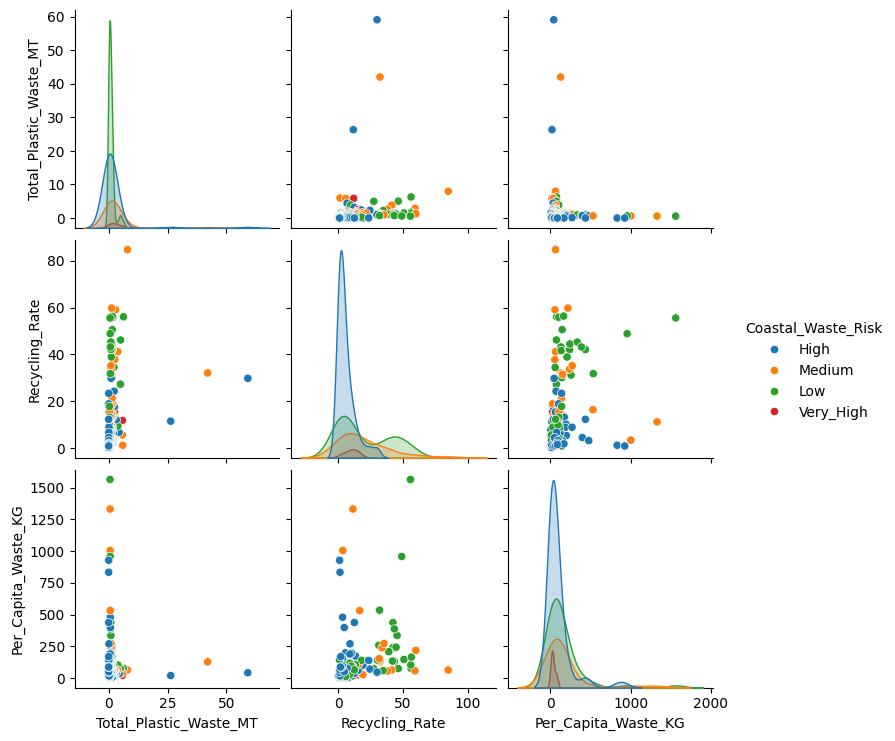

Correlation Matrix for Numerical Features:
                         Total_Plastic_Waste_MT  Recycling_Rate  \
Total_Plastic_Waste_MT                1.000000        0.212583   
Recycling_Rate                        0.212583        1.000000   
Per_Capita_Waste_KG                  -0.046235        0.298651   

                        Per_Capita_Waste_KG  
Total_Plastic_Waste_MT            -0.046235  
Recycling_Rate                     0.298651  
Per_Capita_Waste_KG                1.000000  

Relationship between 'Country' and 'Coastal_Waste_Risk':
                 mean  std
Country                  
Afghanistan      1.0  NaN
Albania          2.0  NaN
Algeria          0.0  NaN
Angola           0.0  NaN
Argentina        2.0  NaN
...              ...  ...
Vietnam          3.0  NaN
Western Sahara   0.0  NaN
Yemen            0.0  NaN
Zambia           1.0  NaN
Zimbabwe         1.0  NaN

[165 rows x 2 columns]

Relationship between 'Main_Sources' and 'Coastal_Waste_Risk':
                       

In [ ]:
nxl="/content/Plastic Waste Around the World.xlsx"
XDB= pd.read_excel(nxl, sheet_name=0)                          # X data base
XDB=XDB.dropna()
XDB.head(5)

#1. Se selecciona las variables de interes
XDB=XDB[["Country","Total_Plastic_Waste_MT","Main_Sources","Recycling_Rate","Per_Capita_Waste_KG","Coastal_Waste_Risk"]]

#2. Determinar la correlacion entre las variables y su impacto sobre la variable de salida

plt.figure(figsize=(10,10))
sns.pairplot(XDB, hue="Coastal_Waste_Risk")
plt.show()

numerical_features = ['Total_Plastic_Waste_MT', 'Recycling_Rate', 'Per_Capita_Waste_KG']
categorical_features = ['Country', 'Main_Sources']

# Calculate correlation for numerical features
numerical_corr = XDB[numerical_features].corr()
print("Correlation Matrix for Numerical Features:\n", numerical_corr)



for feature in categorical_features:
    # Convert 'Coastal_Waste_Risk' to numeric if possible before aggregation
    # Replace 'Low', 'Medium', 'High' with 0, 1, 2 respectively for example
    XDB['Coastal_Waste_Risk_Numeric'] = pd.Categorical(XDB['Coastal_Waste_Risk']).codes
    grouped_data = XDB.groupby(feature)['Coastal_Waste_Risk_Numeric'].agg(['mean', 'std'])
    print(f"\nRelationship between '{feature}' and 'Coastal_Waste_Risk':\n", grouped_data)

    #Mean values in the table: The 'mean' values you see in the table are these average Coastal_Waste_Risk_Numeric values for each category of 'Main_Sources'. So, they directly reflect the average Coastal Waste Risk level, just in a numeric format.





2. Se procede con la implementación del *Modelo KNN*

La matriz de confusión es:
: [[67  7  0  0]
 [24 29  1  0]
 [16 15  2  0]
 [ 3  1  0  0]]
La exactitud es: 0.7559055118110236
La sensibilidad es: 0.5471698113207547
La especificidad es: 0.9054054054054054
El país tiene: ['High']


<Figure size 640x480 with 0 Axes>

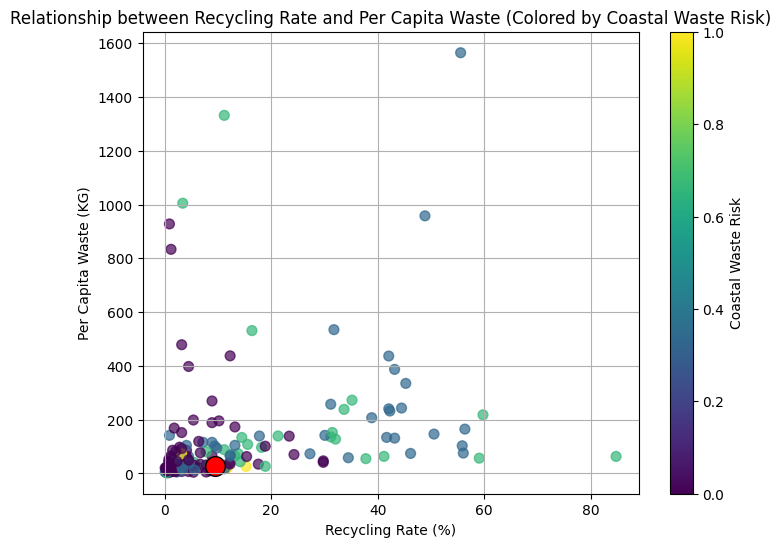

In [ ]:
XD=np.array(XDB[["Total_Plastic_Waste_MT","Main_Sources","Recycling_Rate","Per_Capita_Waste_KG"]])          #Variable entrada
YD=np.array(XDB["Coastal_Waste_Risk"])                                     #Variable Salida

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
XD[:,1] = encoder.fit_transform(XD[:,1]) # Apply encoding to the 'Main_Sources' column (index 1)

# Convert XD to numeric dtype
XD = XD.astype(float)

Knn = KNeighborsClassifier(n_neighbors=10)
Knn.fit(XD,YD)
ydp=Knn.predict(XD)

#2. Evaluar el modelo KNN
cm=confusion_matrix(YD,ydp)
print("La matriz de confusión es:\n:", cm)

VN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
VP=cm[1,1]

Exactitud=(VP+VN)/(VP+VN+FP+FN)
Exactitud
Sensibilidad=VP/(VP+FN)
Sensibilidad
Especificidad=VN/(VN+FP)
Especificidad

print("La exactitud es:", Exactitud)
print("La sensibilidad es:", Sensibilidad)
print("La especificidad es:", Especificidad)

#3. Evaluamos el nivel del riesgo
XDp=np.array([[3.83,0,9.4,28.1]])
ydpp= Knn.predict(XDp)
print("El país tiene:", ydpp)
if ydpp == 0:
  print("High Coastal Waste Risk")
elif ydpp == 1:
  print("Medium Coastal Waste Risk")
elif ydpp == 2:
  print("Low Coastal Waste Risk")
elif ydpp == 3:
  print("Very High Coastal Waste Risk")

plt.figure()

recycling_rate = XDB["Recycling_Rate"]
per_capita_waste = XDB["Per_Capita_Waste_KG"]
YD_numeric = pd.Categorical(YD).codes  # Convert Coastal_Waste_Risk to numerical codes

plt.figure(figsize=(8, 6))
plt.scatter(recycling_rate, per_capita_waste, c=YD_numeric, s=50, cmap="viridis", alpha=0.7)
plt.scatter(XDp[0][2], XDp[0][3], marker="o", s=200, facecolors="red", edgecolors="black", label="Predicted Country")
plt.xlabel("Recycling Rate (%)")
plt.ylabel("Per Capita Waste (KG)")
plt.title("Relationship between Recycling Rate and Per Capita Waste (Colored by Coastal Waste Risk)")

# (Optional) Add a colorbar to show the mapping of colors to Coastal_Waste_Risk categories
cbar = plt.colorbar()
cbar.set_label("Coastal Waste Risk")

plt.grid(True)
plt.show()

Correlación mas alta de variables sigue siendo baja de un 0.29%, entre recycling rate y per capita waste.

*Modelo K-Means*

1. Se procede con la implementación del modelo

los centroides son los siguientes:
 [['0.403', '2.667', '20.200', '1103.267'], ['0.663', '4.000', '24.850', '442.163'], ['1.821', '2.187', '4.031', '19.275'], ['2.365', '3.182', '17.648', '80.036'], ['0.997', '3.630', '27.478', '183.393']]


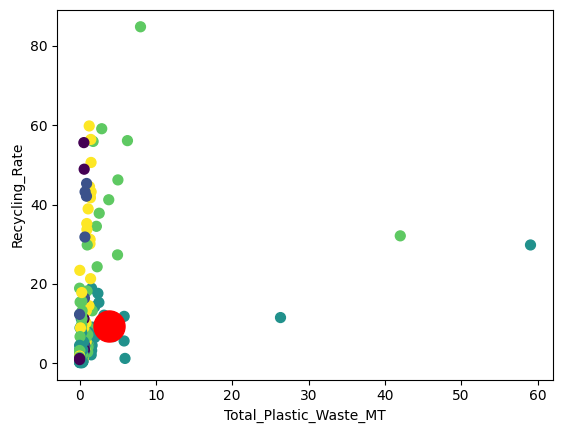

El país pertenece a: [2]
La matriz de confusión es:
: [[ 2  3 46 15  8]
 [ 2  4 20 16 12]
 [ 2  1 11 12  7]
 [ 0  0  3  1  0]
 [ 0  0  0  0  0]]
La exactitud es: 0.5454545454545454
La sensibilidad es: 0.6666666666666666
La especificidad es: 0.4


In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd


def get_closest_risk_category(centroid):
  """
  Finds the closest Coastal_Waste_Risk category to a given cluster centroid.

  Args:
    centroid: A NumPy array representing the cluster centroid.

  Returns:
    The closest Coastal_Waste_Risk category (e.g., "High", "Medium", "Low").
  """

  # Define your logic to determine the closest risk category based on centroid values.
  # This is just an example; you'll need to adapt it to your data and risk categories.

  # Assuming your centroid has features like Total_Plastic_Waste_MT, Recycling_Rate, etc.
  # You can use thresholds or distance calculations to determine the category.
  total_waste = centroid[0]
  recycling_rate = centroid[2]
  per_capita_waste = centroid[3]


  if total_waste > 10 and recycling_rate < 10 and per_capita_waste>25:
      return "Very High"
  elif total_waste > 5 and recycling_rate < 20 and per_capita_waste>15:
      return "High"
  elif total_waste > 2 and recycling_rate < 30 and per_capita_waste>8:
      return "Medium"
  else:
      return "Low"



np.random.seed(42)             #Vamos a tomar las mismas semillas

#1. Construimos el modelo K-Means
XD = np.array(XDB[["Total_Plastic_Waste_MT", "Main_Sources", "Recycling_Rate", "Per_Capita_Waste_KG"]])
YD = np.array(XDB["Coastal_Waste_Risk"])
k=5 #5 motoncitos de datos
mkm= KMeans(n_clusters=k, init="random", random_state=42)
#CONVERTIR MAIN SOURCES A NUMERIC
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
YD_encoded = encoder.fit_transform(YD)  # Encode YD to numerical labels
XD[:, 1] = encoder.fit_transform(XD[:, 1])


mkm.fit(XD)

centroids = mkm.cluster_centers_
# Format each element of the centroids array individually
formatted_centroids = [[f"{val:.3f}" for val in row] for row in centroids]

print("los centroides son los siguientes:\n", formatted_centroids)

#Se trabaja con variables que tengan mayor correlación en este caso ingresos (XD,[,0]) y egresos (XD [,2])
#Tenemos que ubicar al paciente
plt.figure()
plt.scatter(XD[:,0],XD[:,2],c=mkm.labels_,s=50,cmap="viridis")
plt.scatter(XDp[:,0],XDp[:,2],marker="o", s=500, facecolors="red")
plt.xlabel(XDB.columns[1]) # Assuming 'Total_Plastic_Waste_MT' is the first column in XD
plt.ylabel(XDB.columns[3]) # Assuming 'Recycling_Rate' is the third column in XD
plt.show()

ydpkm=mkm.predict(XDp)
print("El país pertenece a:",ydpkm)                               #Cae en fila 5 porque se cuenta desde 0
ydp2=mkm.predict(XD)
cluster_labels = mkm.labels_  # Get cluster labels for all data points
cluster_centers = mkm.cluster_centers_

# Create a mapping from cluster label to Coastal_Waste_Risk category
cluster_to_risk = {}
for i in range(k):
    # Find the closest Coastal_Waste_Risk category to the cluster center
    # You can use different methods to determine the closest category
    # Here, I'm assuming you have a way to convert centroid values to risk categories
    closest_risk = get_closest_risk_category(cluster_centers[i])
    cluster_to_risk[i] = closest_risk

# Convert predicted cluster labels to Coastal_Waste_Risk categories
ydp2_risk = [cluster_to_risk[label] for label in ydp2]


cm=confusion_matrix(YD_encoded,ydp2)
print("La matriz de confusión es:\n:", cm)
VN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
VP=cm[1,1]

Exactitud=(VP+VN)/(VP+VN+FP+FN)
Exactitud
Sensibilidad=VP/(VP+FN)
Sensibilidad
Especificidad=VN/(VN+FP)
Especificidad

print("La exactitud es:", Exactitud)
print("La sensibilidad es:", Sensibilidad)
print("La especificidad es:", Especificidad)


**Análisis de Resultados**

***Naive Bayes***

El modelo aplicado para clasificar el riesgo de residuos costeros (Coastal_Waste_Risk) en base a las variables de entrada arrojó los siguientes resultados, en cuanto a la exactitud arrojó un 50.9%, lo cual significa que el modelo logra clasificar correctamente el riesgo de residuos costeros en aproximadamente la mitad de los casos. En un conjunto de 165 países, se espera que el modelo cometa errores en aproximadamente 82.5 casos. La tasa de error es de 23.03%, lo que indica que el modelo tiene dificultades para clasificar correctamente algunos casos, adicionalmente en la sensibilidad se ve que el modelo presenta dificultades para identificar correctamente los países con mayor riesgo de residuos costeros puesto que arrojó un 42%, lo que indica que solo es capaz de identificar correctamente el riesgo alto en el 42% de los casos. Sin embargo la especificidad del modelo es de 68.47%, lo que significa que el modelo es más efectivo para clasificar los casos de bajo riesgo, esta información se respalda con la predicción negativa que es también de 68.47%, demostrando el mejor rendimiento al identificar países con bajo riesgo de residuos costeros. La precisión del modelo, que mide la proporción de predicciones correctas entre todas las predicciones positivas, es del 70%, lo cual sugiere que cuando el modelo clasifica un país con un nivel de riesgo alto, por lo tanto hay un 70% de probabilidad de que esta predicción sea verídica.

Es importante destacar que el modelo implementado para predecir el riesgo de residuos plásticos costeros se evalúa considerando todos los países incluidos en la base de datos, lo que abarca tanto a aquellos con mayores cantidades de residuos como a los que tienen menores registros.


***Árboles de decisión***

El modelo  muestra un buen nivel de exactitud con un 82.68%, lo que significa que predice correctamente el nivel de riesgo ambiental en la mayoría de los casos. La sensibilidad del 67.92% indica que identifica un alto porcentaje de casos con riesgo alto de contaminación costera. La especificidad de 93.24% demuestra que el modelo es más efectivo en identificar correctamente los casos de bajo o moderado riesgo, evitando falsos positivos en gran medida. Con un total de 165 observaciones en la tabla, el modelo es robusto y ofrece una herramienta confiable para clasificar el nivel de riesgo ambiental de distintos países.

Vamos a realizar un análisis en donde veremos 1 país por region:

1. *África y Oceanía:*
En Africa analizamos a Egipto con
Recycling Rate < 29.95
Total Plastic Waste > 0.1
Total Plastic Waste > 0.48
Per Capita Waste > 26.15
Total Plastic Waste > 1.22
Llegando al nodo de (6, 2, 11, 0) con un total de países de 19. Egipto tiene la mayor probabilidad de tener un riesgo medio respecto a contaminacion ambiental costera, con una probabilidad del 57%.

En oceanía analizamos las islas Fiji
Recycling Rate < 29.95
Total Plastic Waste < 0.1
Per Capita Waste > 5.7
Total Plastic Waste > 0.025
Total Plastic Waste > 0.055
Llegando al nodo de (11, 1, 0, 0) con 12 países, Fiji tiene una probabilidad del 91.6% de tener un riesgo High respecto a la contaminación ambiental costera-



2. *Norte America y Sur America:*
- En la primer región tomamos a Estados Unidos
Recycling Rate <= 29.95-->False
Recycling Rate <= 57.75-->True
Recycling Rate <= 41.45-->True
Per Capita Waste <= 50.0-->False
Total Plastic Waste <= 10-->False

El Nodo de destino es (0, 0, 3, 0), el cual es un nodo puro del 100% lo que indica que la tasa de reciclaje de este país es  moderada o intermedias lo cual es acertado ya que este Estados Unidos riesgo medio.


-En la segunda región tomamos a Ecuador
Recycling Rate <= 29.95-->True
Total Plastic Waste <= 0.1-->False
Total Plastic Waste <= 0.48-->False
Per Capita Waste <= 26.15-->False
Total Plastic Waste <= 1.22-->True

Siguiendo esta trayectoria en el árbol, Ecuador llega al nodo destino (15, 4, 6, 0), lo cual indica que este país tiene una alta cantidad de residuos plásticos totales y un riesgo costero alto. Esto sugiere un alto impacto ambiental debido a la combinación de factores como el bajo reciclaje y el riesgo en áreas costeras.


3.  *Europa y Asia:*
En Europa analizamos a Alemania con
Recycling Rate < 29.95 --> False
Recycling Rate < 57.75 --> True
Recycling Rate < 41.45 --> False

Llegando al nodo de (0, 15, 0, 0) con un total de 15 países. Alemania toma un riumbo en el arbol de cisiones que lleva a un nodo puro, del 100%, teniendo una tasa de reciclaje inferior a 41.45, tasa considerada media.

En Asia analizamos Corea del Sur
Recycling Rate < 29.95 --> False
Recycling Rate < 57.75 --> False

Llegando al nodo de (0, 0, 3, 0) con 3 países, Corea del sur cuenta con un nodo puro, del 100%, este cuenta con una tasa media-alta de reciclaje.


***Modelo KNN***

Por medio del modelo encontramos la correlación entre las variables cuantitativas del modelo, analizamos 3 las cuales son: El total de desechos plasticos, el porcentaje de reciclaje y los desechos por capita. Para esto dependiendo del país aparecia el riesgo de desechos costales. En general se encontró una muy baja correlación entre estas variables, siendo la más baja entre El total de desechos plasticos y el desecho por capita con un valor de -0.0462 y siendo la mayor correlación entre el porcentaje de reciclaje y el desecho por capita con un valor de 0.2986.
Identificada las dos variables con mayor correlación, por medio de una grafica analizamos la relación entre el porcentaje de reciclaje y de los desechos por capita.El análisis del modelo KNN muestra una exactitud del 75.6% lo cual indica que es confiable, una sensibilidad de 54.7% y una alta especificidad de 90.5%. Esto indica que el modelo es efectivo en identificar correctamente los casos negativos (baja probabilidad de falsos positivos), pero tiene una sensibilidad limitada para detectar casos positivos, lo cual podría resultar en algunos falsos negativos.
Realizamos una predicción para evaluar el nivel de reisgo de un país con las siguientes características ([[3.83,0,9.4,28.1]]),  El modelo clasificó este país como de alto riesgo (High), asignándole un valor de 0, lo cual indica la capacidad del modelo para generalizar y posicionar correctamente un país fuera del conjunto de datos original. Esta predicción demuestra que el modelo KNN no solo responde adecuadamente a las observaciones dentro de la muestra de datos, sino que también puede extenderse a nuevos casos con características similares, lo que es crucial para aplicaciones futuras en análisis de riesgo ambiental para países no observados en el conjunto inicial.



***Modelo K-MEANS***

**Analisis General variables K-Means**

Este modelo mostró una exactitud que alcanzó un porcentaje del 54% (Lo cual hace que el modelo no sea considerado aceptable o confiable,puesto que lo ideal es que sea mayor a 75%) tambien da a entender  que el modelo clasifica los residuos costeros un 4% más de la mitad, es decir  cuenta con un porcentaje de 46% en el que presenta error en los datos arrojados (un porcentaje muy alto para margen de error) esto da a entender que 75,9 de los datos (paises). La métrica de sensibilidad alcanzó un valor del 66 frente a la aprobación y una especificidad del 40%.


**Analisis centroides K-Means**

Respecto a los resultados de los centroides; De Total_Plastic_Waste_MT el monto mayor se encuentra en el clúster 3 con un valor de 2.365, mientras que el monto menor se encuentra en el clúster 0 con un valor de 0.403, Por otro lado en el aspecto de  "Main_Sources" el monto valor se posiciona en el clúster numero 1 con un valor de 4 mientras que el clúster 2 cuenta con el valor más bajo equivalente a 2.187. Por el lado de  "Recycling_Rate" el cluster numero 4 cuenta con el valor más alto, este de 27.478 mientras que el mas bajo es el clúster 2 que cuenta con 4.031, 23 por debajo del más alto. Finalmente se analiza el "Per_Capita_Waste_KG" el cual cuenta con el valor mas alto de 1103.267 kilogramos en el clúster 0, de este le sigue el clúster 1 con un monto de 442.163, en tercer lugar el clúster 4 con 183.393 kilohgramos, despues el clúster 3 con un monto de 80 kilogramos, de ultimo esta 19.275 kilogramos en el clúster número 2.


**Conclusion Final**

 Evidenciamos que el modelo del  Árbol de Decisión y el KNN son los modelos más efectivos en términos de exactitud y especificidad, destacándose para la identificación de países con bajo o moderado riesgo de residuos costeros. Sin embargo Los modelos Naive Bayes y K-Means fueron menos precisos en la clasificación directa, igualmente aportaron valor en el análisis exploratorio y de agrupamiento, ayudando a identificar patrones en el manejo de residuos plásticos y en las tasas de reciclaje de los países.